<a href="https://colab.research.google.com/github/ashia-002/Fake-News-Detection-Bilingual-Multimodel/blob/main/CNN_Pipeline/image_Clasification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

/tmp/ipython-input-2896494265.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


## 1. Setting the path

In [3]:
# New line for Google Colab:
main_dir = r"/content/drive/MyDrive/CNN/data" # Adjust 'newsDataset' if you uploaded a different folder

In [4]:
import os
os.listdir(main_dir)

['fake', 'real']

In [5]:
for folder_name in os.listdir(main_dir):
    # 1. Get the full path to the subfolder ('/path/to/your/main_dir/fake')
    path_to_subfolder = os.path.join(main_dir, folder_name)

    # 2. Get the full path to the images ('/path/to/your/main_dir/fake/BN')
    for folder in os.listdir(path_to_subfolder):
      img_path = os.path.join(path_to_subfolder, folder)


In [6]:
os.listdir(img_path)

['maxresdefault-2.jpg',
 'sddefault-3.jpg',
 'sddefault-4.jpg',
 'maxresdefault-7.jpg',
 'maxresdefault-8.jpg',
 'maxresdefault-10.jpg',
 'maxresdefault-11.jpg',
 'maxresdefault-12.jpg',
 'maxresdefault-13.jpg',
 'maxresdefault-14.jpg',
 'maxresdefault-17.jpg',
 'maxresdefault-18.jpg',
 'maxresdefault-21.jpg',
 'maxresdefault-23.jpg',
 'maxresdefault-24.jpg',
 'maxresdefault-27.jpg',
 'maxresdefault-28.jpg',
 'maxresdefault-31.jpg',
 '-Pyx3kAkTCk.jpg',
 '7cQvaIHcG3k.jpg',
 'maxresdefault-40.jpg',
 'maxresdefault-44.jpg',
 'VA3cxO7n5YI.jpg',
 '8OYyNOpgGBE.jpg',
 'UAbnCQ-lkec.jpg',
 'pm7VNDvFp-c.jpg',
 'mdP8hDcUjPU.jpg',
 'BM-dTUufr0k.jpg',
 'z3UKiJXzDmk.jpg',
 'ROoHlbt7na0.jpg',
 'uSRY0XJKEOo.jpg',
 'AKaT_Bap-Rc.jpg',
 'gspOwMSAq_4.jpg',
 'hPe5Z-7MEdM.jpg',
 'p1cAoG5o03k.jpg',
 'Tl6hQO7rKfw.jpg',
 'h0NNawep8MA.jpg',
 '3qYW8-_-scM.jpg',
 'Jg-09zAbapE.jpg',
 'h-hj6Zulbw8.jpg',
 'NjgQiltivVQ.jpg',
 'j0ZqvoTQicY.jpg',
 '60fNg2FGgEk.jpg',
 '2025-10-16 000257.jpg',
 '2025-10-16 000347.jpg',
 

In [7]:

#/content/drive/MyDrive/CNN/data/fake/BN/-1RWCMzPMOg.jpg
img = cv2.imread(os.path.join(main_dir, 'fake', 'BN', '-1RWCMzPMOg.jpg'))

In [8]:
type(img) #numpy array


numpy.ndarray

In [9]:
img.shape #rgb channel

(720, 1280, 3)

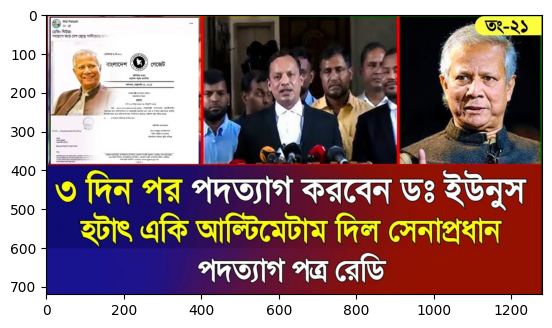

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 2. loading Image

In [11]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [12]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

### 2.1. removing empty image

In [13]:
for folder_name in os.listdir(main_dir):
    # 1. Get the full path to the subfolder ('/path/to/your/main_dir/fake')
    path_to_subfolder = os.path.join(main_dir, folder_name)

    # 2. Get the full path to the images ('/path/to/your/main_dir/fake/BN')
    for folder in os.listdir(path_to_subfolder):
      img_path = os.path.join(path_to_subfolder, folder)

      try:
        img = cv2.imread(img_path)
        tip = imghdr.what(img_path)
        if tip not in image_exts:
          print('Image not in ext list{}'.format(img_path))
          os.remove(img_path)
      except Exception as e:
        print('Issue with image {}'.format(img_path))



Issue with image /content/drive/MyDrive/CNN/data/fake/EN
Issue with image /content/drive/MyDrive/CNN/data/fake/BN
Issue with image /content/drive/MyDrive/CNN/data/real/EN
Issue with image /content/drive/MyDrive/CNN/data/real/BN


### 2.2. load data in tensorflow

In [14]:
import tensorflow as tf

In [15]:
# for building data pipeline
tf.data.Dataset??

In [16]:
tf.keras.utils.image_dataset_from_directory??

In [17]:
data = tf.keras.utils.image_dataset_from_directory(main_dir)

Found 4000 files belonging to 2 classes.


In [18]:
'''A Python iterator allows you to use standard Python flow control,
primarily the next() function or a for loop, to sequentially pull data batches.'''
data_iterator = data.as_numpy_iterator() #allowing to loop through the whole pipelne

In [19]:
batch = data_iterator.next() # grabing the batch each time

In [20]:
len(batch) # two parts: image from the directory(batch[0]), label(batch[1])

2

In [21]:
# represented as numpy arrays
batch[0].shape #the pipeline automatically reshaped the image

(32, 256, 256, 3)

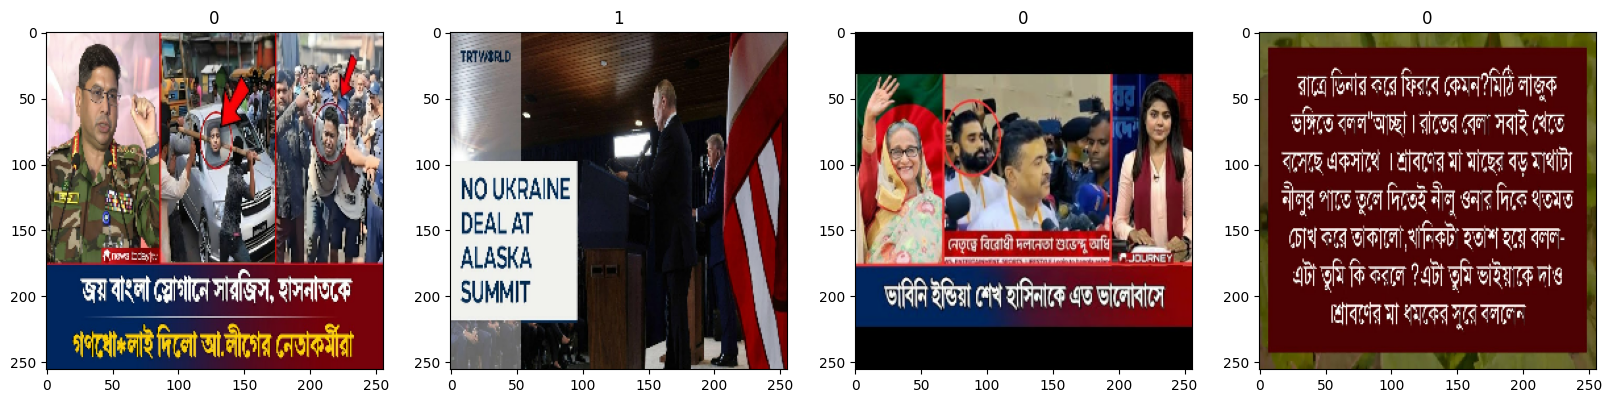

In [22]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx]) #fake = 0, real = 1

## 3. Preprocess data

In [23]:
batch[0].max()

np.float32(255.0)

In [24]:
batch[0].min()

np.float32(0.0)

### 3.1. Normalization$\text{Value} / 255$

In [25]:
data = data.map(lambda x,y: (x/255, y)) #in pipeline mapping each batch and normalizing where x=batch[0]

In [26]:
# now looking at a batch
batch = data.as_numpy_iterator().next()

In [27]:
batch[0].min()

np.float32(0.0)

In [28]:
batch[0].max()

np.float32(1.0)

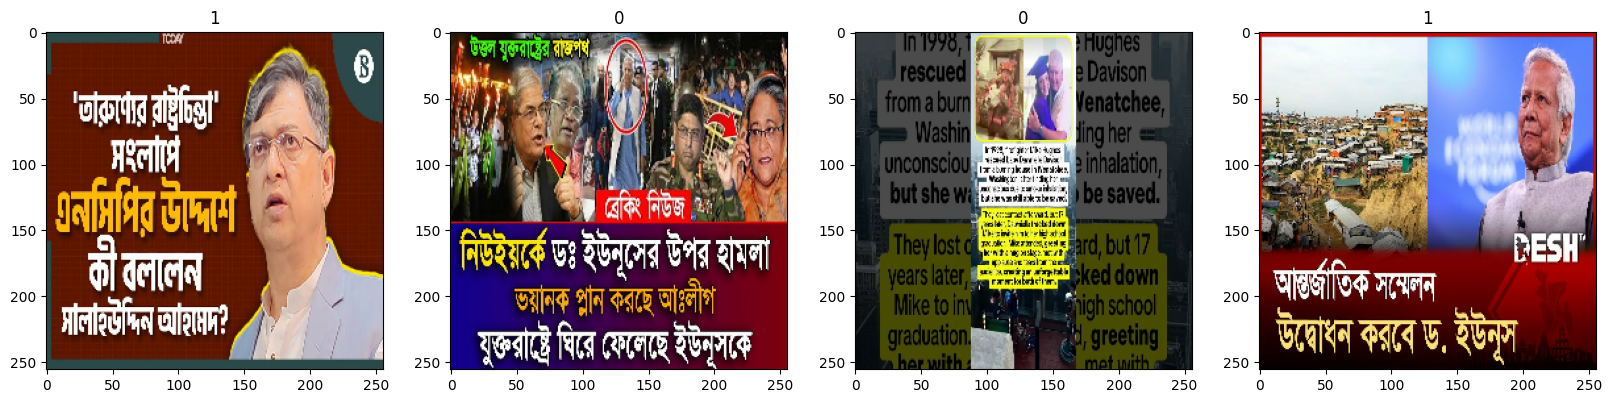

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(float)) #now it's not int anymore
  ax[idx].title.set_text(batch[1][idx]) #fake = 0, real = 1

### 3.2. Split the data

In [30]:
len(data) # total 125 batches(125x32=4000)

125

In [31]:
# Calculate 70% of the total number of batches/elements in the dataset for training.
train_size = int(len(data) * 0.7)
# Calculate 20% for validation, and add 1 to ensure all data is accounted for when using integer math.
val_size = int(len(data) * 0.2) + 1
# Calculate 10% for testing, and add 1 to ensure all data is accounted for when using integer math.
test_size = int(len(data) * 0.1) + 1

In [32]:
val_size

26

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
#Final Optimization (Cache and Prefetch) ---
AUTOTUNE = tf.data.AUTOTUNE
# Shuffle the ENTIRE Dataset FIRST ---
# This ensures a random distribution across the resulting splits.
BUFFER_SIZE = 1000  # A good buffer size for effective shuffling
data = data.shuffle(buffer_size=BUFFER_SIZE)

In [35]:
# Apply cache and prefetch to ALL datasets
train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)
test = test.cache().prefetch(buffer_size=AUTOTUNE)

print("Data pipeline successfully implemented:")
print(f"   - Full dataset was shuffled before splitting.")
print(f"   - Split sizes: Train ({train_size}), Val ({val_size}), Test ({len(test)})")
print(f"   - All datasets are optimized with .cache() and .prefetch().")

Data pipeline successfully implemented:
   - Full dataset was shuffled before splitting.
   - Split sizes: Train (87), Val (26), Test (12)
   - All datasets are optimized with .cache() and .prefetch().


## 4. Build Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
model = Sequential()

In [38]:
# Block 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

# Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

# Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

# --- Classification Head ---

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,372,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,467,073 (28.48 MB)

 Trainable params: 7,466,625 (28.48 MB)

 Non-trainable params: 448 (1.75 KB)

### Train the model

In [41]:
log_dir = r"/content/drive/MyDrive/CNN/logs"

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [43]:
# Setup Early Stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',         # Stop when validation loss stops improving
    patience=8,                # Wait 8 epochs for improvement
    restore_best_weights=True   # Keep the best weights found
)

In [44]:
hist = model.fit(train,
                 epochs=20,
                 validation_data=val,
                 callbacks=[tensorboard_callback, early_stopping] )

Epoch 1/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 763s 9s/step - accuracy: 0.8399 - loss: 1.9025 - val_accuracy: 0.4904 - val_loss: 26.4076
Epoch 2/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 651s 7s/step - accuracy: 0.9127 - loss: 0.3752 - val_accuracy: 0.4904 - val_loss: 7.3149
Epoch 3/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 650s 7s/step - accuracy: 0.9470 - loss: 0.2129 - val_accuracy: 0.4976 - val_loss: 21.6021
Epoch 4/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 653s 8s/step - accuracy: 0.9424 - loss: 0.2400 - val_accuracy: 0.4904 - val_loss: 28.6071
Epoch 5/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 648s 7s/step - accuracy: 0.9395 - loss: 0.2782 - val_accuracy: 0.5685 - val_loss: 7.2648
Epoch 6/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 685s 8s/step - accuracy: 0.9295 - loss: 0.1615 - val_accuracy: 0.7091 - val_loss: 7.8870
Epoch 7/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 646s 7s/step - accuracy: 0.9494 - loss: 0.2407 - val_accuracy: 0.9579 - val_loss: 0.1109
Epoch 8/20
87/87 ━━━━━━━━━━━━━━━━━━━━ 649s 7s/step - accuracy: 0.9489 - loss: 0.2613 - val_accuracy: 0.9688 

In [45]:
hist.history

{'accuracy': [0.8818247318267822,
  0.9159482717514038,
  0.9410919547080994,
  0.9371408224105835,
  0.9321120977401733,
  0.9371408224105835,
  0.9410919547080994,
  0.9436063170433044,
  0.9590517282485962,
  0.9565373659133911,
  0.9633620977401733,
  0.9633620977401733,
  0.9658764600753784,
  0.9709051847457886,
  0.9734195470809937,
  0.9637212753295898,
  0.960488498210907,
  0.9676724076271057,
  0.9744971394538879,
  0.9705459475517273],
 'loss': [1.1703999042510986,
  0.3365134596824646,
  0.26551583409309387,
  0.2241239845752716,
  0.23557840287685394,
  0.1758671998977661,
  0.27597397565841675,
  0.2626221477985382,
  0.08719613403081894,
  0.09309707581996918,
  0.0603267140686512,
  0.04988715425133705,
  0.09399568289518356,
  0.07295317202806473,
  0.06774621456861496,
  0.09472893178462982,
  0.07990724593400955,
  0.09459958225488663,
  0.044908713549375534,
  0.06746412068605423],
 'val_accuracy': [0.49038460850715637,
  0.49038460850715637,
  0.4975961446762085,


### Plot Performance

<function matplotlib.pyplot.show(close=None, block=None)>

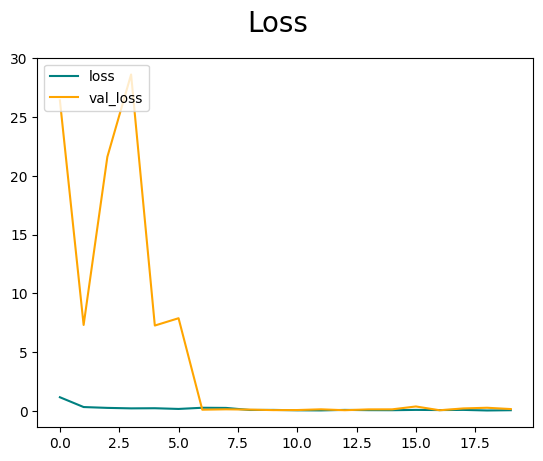

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show

### Evaluate the model

In [53]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [54]:
for batch in test.as_numpy_iterator():
  x, y = batch
  yhat = model.predict(x)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [55]:
print(f'Precision: {pre.result()}, Result: {re.result()}, Accuracy: {acc.result()}')

Precision: 0.9707317352294922, Result: 1.0, Accuracy: 0.984375


In [56]:
# Assuming 'model' has the best weights restored, and 'test' is your optimized test dataset

print("Evaluating final model performance on the test set...")

# Run the evaluation
test_results = model.evaluate(test)

# Print the results
print("\n--- Test Set Evaluation Results ---")
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]*100:.2f}%")

Evaluating final model performance on the test set...
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.9847 - loss: 0.0220

--- Test Set Evaluation Results ---
Test Loss: 0.0275
Test Accuracy: 98.44%


## 5. Test Model

In [65]:
import os
from google.colab import files
uploaded = files.upload()

Saving 2PZKIinszVc.jpg to 2PZKIinszVc.jpg


In [66]:
filename = list(uploaded.keys())[0]
img = cv2.imread(filename)

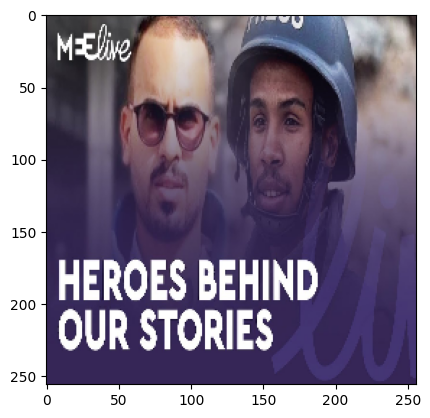

In [67]:
resize = tf.image.resize(img, (256, 256))
resize = resize.numpy().astype('uint8')
plt.imshow(cv2.cvtColor(resize, cv2.COLOR_BGR2RGB))
plt.show()

In [68]:
# Convert to a NumPy array (and ensure it's a float, typically 0-255 scale)
img_array = resize

# 2. Prepare for Model Prediction (Crucial Steps)

# Normalize the input (0-255 scale to 0-1 scale)
input_tensor = img_array / 255.0

# Add a batch dimension (The model expects shape [1, 256, 256, 3])
input_tensor = tf.expand_dims(input_tensor, 0)


# 3. Make the Prediction
prediction = model.predict(input_tensor)

# Extract the probability (since your model uses sigmoid for binary output)
probability = prediction[0][0]

# 4. Interpret the Result
if probability > 0.5:
    result = "FAKE"
    confidence = probability * 100
else:
    result = "REAL"
    confidence = (1 - probability) * 100

print(f"\nModel Prediction for the image:")
print(f"The image is classified as: **{result}**")
print(f"Confidence: **{confidence:.2f}%**")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step

Model Prediction for the image:
The image is classified as: **FAKE**
Confidence: **100.00%**
